## Importing impotant libraries 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
#reading thew csv file 
#Data loading 
file_path = 'CPI_Historic_Mar23.csv'
cpi_hist = pd.read_csv(file_path)
vehicles = pd.read_csv('Naamsa_Vehicle_Sales (1).csv')

In [3]:
display('cpi_data', cpi_hist.head(10),
        'cpi_shape', cpi_hist.shape)

'cpi_data'

Month                          Category  Value  \
0  31-03-2023                      Headline_CPI  109.0   
1  31-03-2023  Food and non-alcoholic beverages  116.7   
2  31-03-2023   Alcoholic beverages and tobacco  109.2   
3  31-03-2023             Clothing and footwear  103.4   
4  31-03-2023             Housing and utilities  104.5   
5  31-03-2023   Household contents and services  107.8   
6  31-03-2023                            Health  109.1   
7  31-03-2023                         Transport  112.9   
8  31-03-2023                     Communication   99.7   
9  31-03-2023            Recreation and culture  104.2   

   Percentage Change (From Prior Month)  
0                                   1.0  
1                                   1.0  
2                                   2.2  
3                                  -0.1  
4                                   0.4  
5                                   1.1  
6                                   0.6  
7                                   2.1  
8                                  -0.1  
9                                   0.9

'cpi_shape'

(195, 4)

In [4]:
# Pivot the DataFrame
cpi_pivot = cpi_hist.pivot(index= 'Month', columns= 'Category', values= 'Value').reset_index()
cpi_pivot['Month']= pd.to_datetime(cpi_pivot['Month'])
cpi_pivot = cpi_pivot.sort_values('Month').reset_index(drop = True)


In [5]:
cpi_pivot

Category      Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0        2022-01-31                            100.0                  100.2   
1        2022-02-28                            100.6                  100.3   
2        2022-03-31                            102.8                  100.5   
3        2022-04-30                            103.6                  100.7   
4        2022-05-31                            104.4                  100.9   
5        2022-06-30                            104.5                  101.3   
6        2022-07-31                            104.4                  101.6   
7        2022-08-31                            104.7                  102.1   
8        2022-09-30                            105.6                  102.5   
9        2022-10-31                            106.1                  102.6   
10       2022-11-30                            106.4                  102.6   
11       2022-12-31                            106.2                  102.8   
12       2023-01-31                            106.5                  102.9   
13       2023-02-28                            106.9                  103.5   
14       2023-03-31                            109.2                  103.4   

Category  Communication  Education  Food and non-alcoholic beverages  \
0                  99.8      100.0                             100.9   
1                  99.7      100.0                             101.8   
2                  99.7      104.4                             102.4   
3                  99.6      104.4                             103.1   
4                  99.9      104.4                             105.3   
5                 100.3      104.4                             106.6   
6                  99.4      104.4                             107.8   
7                 100.1      104.4                             109.7   
8                  99.9      104.4                             110.3   
9                  99.8      104.4                             111.3   
10                 99.2      104.4                             111.9   
11                 99.1      104.4                             112.4   
12                 99.4      104.4                             114.4   
13                 99.8      104.4                             115.6   
14                 99.7      110.4                             116.7   

Category  Headline_CPI  Health  Household contents and services  \
0                100.2   100.1                            100.4   
1                100.8   103.2                            100.4   
2                101.8   103.7                            100.8   
3                102.4   104.0                            101.1   
4                103.1   104.3                            101.8   
5                104.2   104.6                            103.0   
6                105.8   104.1                            103.3   
7                106.0   104.2                            103.7   
8                106.1   104.0                            104.5   
9                106.5   104.5                            105.0   
10               106.8   104.7                            105.2   
11               107.2   104.8                            106.1   
12               107.1   104.9                            106.6   
13               107.9   108.5                            106.6   
14               109.0   109.1                            107.8   

Category  Housing and utilities  Miscellaneous goods and services  \
0                         100.0                             100.6   
1                         100.1                             101.5   
2                         100.5                             101.9   
3                         100.5                             102.8   
4                         100.6                             102.9   
5                         101.2                             103.0   
6                         

In [6]:
# Adding a row 
date_str = '2023-04-30'
date_obj = pd.to_datetime(date_str)
new_row = pd.DataFrame({'Month':[date_obj]})
cpi_pivot =pd.concat([cpi_pivot, new_row]).reset_index(drop= True)

In [7]:
cpi_pivot

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0  2022-01-31                            100.0                  100.2   
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0            99.8      100.0                             100.9         100.2   
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
0    100.1                            100.4                  100.0   
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2   
6    104.1                            103.3                  103.1   
7    104.2                            103.7                  103.2   
8    104.0                            104.5                  103.7   
9    104.5                            105.0                  103.8   
10   104.7                            105.2                  103.8   
11   104.8                            106.1                  104.1   
12   104.9                            106.6                  104.1   
13   108.5                            106.6                  104.1   
14   109.1                            107.8                  104.5   
15     NaN                              NaN                    NaN   

    Miscellaneous goods and services  Recreation and culture  \
0                              100.6                   100.2   
1                              101.5                   100.3   
2                     

## EDA

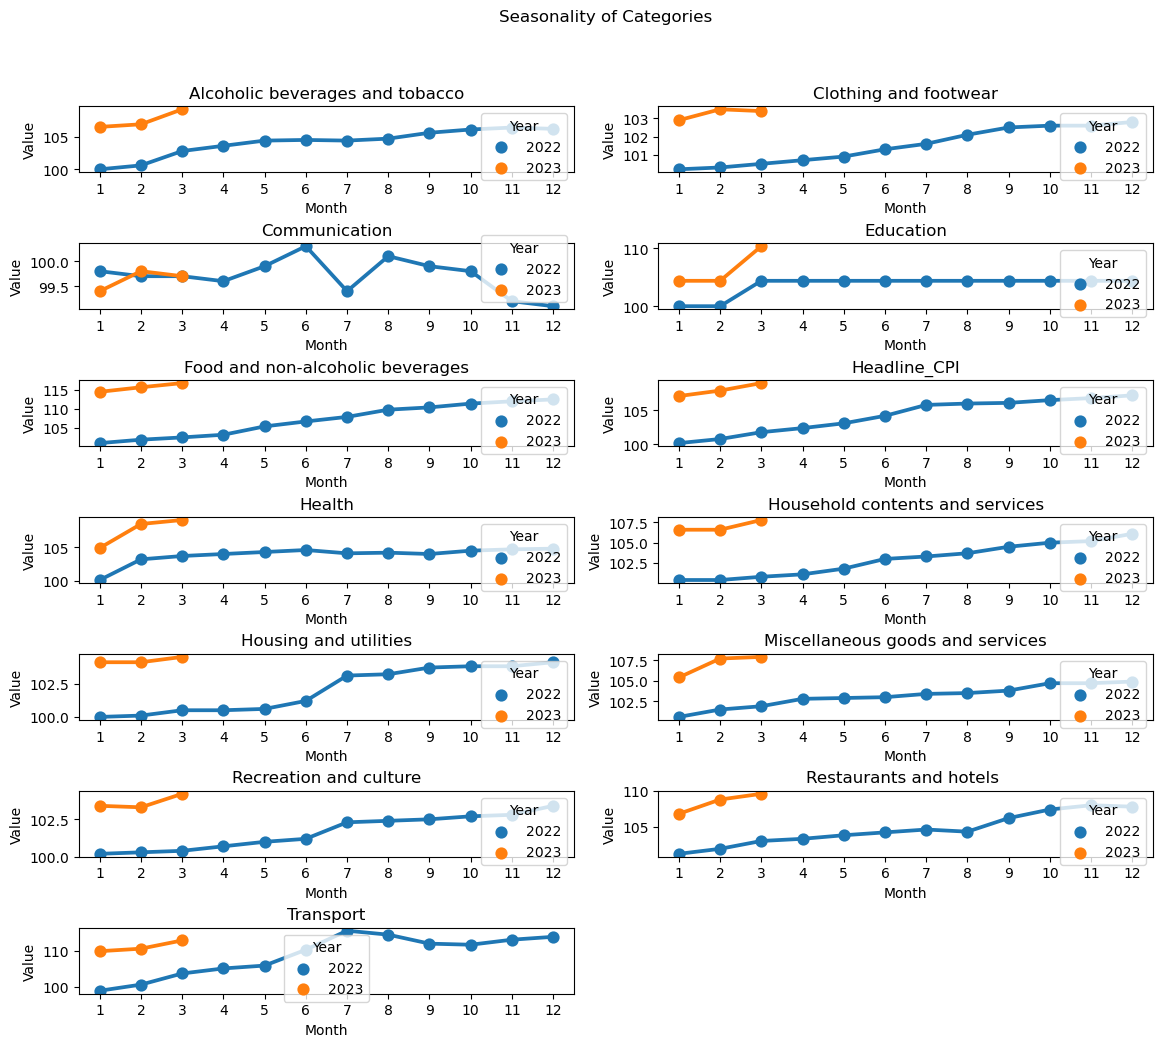

In [8]:
# Create a temporary dataframe with Month and Year columns
df_temp = cpi_pivot.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp['Month']).year
df_temp['Month'] = pd.DatetimeIndex(df_temp['Month']).month

# Define the categories to plot
categories_to_plot = cpi_pivot.columns[1:]

# Create subplots
num_categories = len(categories_to_plot)
num_rows = math.ceil(num_categories / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over each category and plot its seasonality
for i, category in enumerate(categories_to_plot):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.pointplot(x='Month', y=category, hue='Year', data=df_temp, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Hide any unused subplots
for i in range(num_categories, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.axis('off')

plt.suptitle('Seasonality of Categories', y=1.05)
plt.show()

In [9]:
cpi_pivot.columns[1:].to_list()

['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ',
 'Transport']

In [10]:
cpi_pivot

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0  2022-01-31                            100.0                  100.2   
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0            99.8      100.0                             100.9         100.2   
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
0    100.1                            100.4                  100.0   
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2   
6    104.1                            103.3                  103.1   
7    104.2                            103.7                  103.2   
8    104.0                            104.5                  103.7   
9    104.5                            105.0                  103.8   
10   104.7                            105.2                  103.8   
11   104.8                            106.1                  104.1   
12   104.9                            106.6                  104.1   
13   108.5                            106.6                  104.1   
14   109.1                            107.8                  104.5   
15     NaN                              NaN                    NaN   

    Miscellaneous goods and services  Recreation and culture  \
0                              100.6                   100.2   
1                              101.5                   100.3   
2                     

In [11]:
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], format= '%Y-%b').dt.strftime('%Y-%m') 
start_date = datetime.datetime.strptime("2020-12-31", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-31", "%Y-%m-%d")

D = 'M'
date_list = pd.date_range(start_date, end_date, freq= D)[:: -1]
vehicles['Month'] = date_list


cpi_pivot['Month'].head()

0   2022-01-31
1   2022-02-28
2   2022-03-31
3   2022-04-30
4   2022-05-31
Name: Month, dtype: datetime64[ns]

In [12]:
vehicles['year_month']= pd.to_datetime(vehicles['Month'], format= "%Y-%b").dt.strftime('%Y-%m')
vehicles['year_month'].head()

0    2023-03
1    2023-02
2    2023-01
3    2022-12
4    2022-11
Name: year_month, dtype: object

In [13]:
cpi_pivot = cpi_pivot.merge(vehicles[['year_month', 'Total_Local Sales', 'Total_Export_Sales']], on='year_month', how='left')
cpi_pivot 

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0  2022-01-31                            100.0                  100.2   
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0            99.8      100.0                             100.9         100.2   
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
0    100.1                            100.4                  100.0   
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2   
6    104.1                            103.3                  103.1   
7    104.2                            103.7                  103.2   
8    104.0                            104.5                  103.7   
9    104.5                            105.0                  103.8   
10   104.7                            105.2                  103.8   
11   104.8                            106.1                  104.1   
12   104.9                            106.6                  104.1   
13   108.5                            106.6                  104.1   
14   109.1                            107.8                  104.5   
15     NaN                              NaN                    NaN   

    Miscellaneous goods and services  Recreation and culture  \
0                              100.6                   100.2   
1                              101.5                   100.3   
2                     

Feature Engineering 

In [14]:
#Lagging 

#trying to find the change that happened the previous months and see if there's patterns to the current value.
feats_to_lag = cpi_pivot.columns[1:].to_list()
for col in feats_to_lag:
    if col not in ['year_month']:
        for i in range(1, 2):
            cpi_pivot[f"prev_{i}_month_{col})"] = cpi_pivot[col].shift(i)
            
cpi_pivot

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
0  2022-01-31                            100.0                  100.2   
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
0            99.8      100.0                             100.9         100.2   
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
0    100.1                            100.4                  100.0   
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2   
6    104.1                            103.3                  103.1   
7    104.2                            103.7                  103.2   
8    104.0                            104.5                  103.7   
9    104.5                            105.0                  103.8   
10   104.7                            105.2                  103.8   
11   104.8                            106.1                  104.1   
12   104.9                            106.6                  104.1   
13   108.5                            106.6                  104.1   
14   109.1                            107.8                  104.5   
15     NaN                              NaN                    NaN   

    Miscellaneous goods and services  Recreation and culture  \
0                              100.6                   100.2   
1                              101.5                   100.3   
2                     

In [15]:
cpi_pivot = cpi_pivot.drop(0)
cpi_pivot = cpi_pivot.bfill()

In [16]:
cpi_pivot 

Month  Alcoholic beverages and tobacco  Clothing and footwear  \
1  2022-02-28                            100.6                  100.3   
2  2022-03-31                            102.8                  100.5   
3  2022-04-30                            103.6                  100.7   
4  2022-05-31                            104.4                  100.9   
5  2022-06-30                            104.5                  101.3   
6  2022-07-31                            104.4                  101.6   
7  2022-08-31                            104.7                  102.1   
8  2022-09-30                            105.6                  102.5   
9  2022-10-31                            106.1                  102.6   
10 2022-11-30                            106.4                  102.6   
11 2022-12-31                            106.2                  102.8   
12 2023-01-31                            106.5                  102.9   
13 2023-02-28                            106.9                  103.5   
14 2023-03-31                            109.2                  103.4   
15 2023-04-30                              NaN                    NaN   

    Communication  Education  Food and non-alcoholic beverages  Headline_CPI  \
1            99.7      100.0                             101.8         100.8   
2            99.7      104.4                             102.4         101.8   
3            99.6      104.4                             103.1         102.4   
4            99.9      104.4                             105.3         103.1   
5           100.3      104.4                             106.6         104.2   
6            99.4      104.4                             107.8         105.8   
7           100.1      104.4                             109.7         106.0   
8            99.9      104.4                             110.3         106.1   
9            99.8      104.4                             111.3         106.5   
10           99.2      104.4                             111.9         106.8   
11           99.1      104.4                             112.4         107.2   
12           99.4      104.4                             114.4         107.1   
13           99.8      104.4                             115.6         107.9   
14           99.7      110.4                             116.7         109.0   
15            NaN        NaN                               NaN           NaN   

    Health  Household contents and services  Housing and utilities  \
1    103.2                            100.4                  100.1   
2    103.7                            100.8                  100.5   
3    104.0                            101.1                  100.5   
4    104.3                            101.8                  100.6   
5    104.6                            103.0                  101.2   
6    104.1                            103.3                  103.1   
7    104.2                            103.7                  103.2   
8    104.0                            104.5                  103.7   
9    104.5                            105.0                  103.8   
10   104.7                            105.2                  103.8   
11   104.8                            106.1                  104.1   
12   104.9                            106.6                  104.1   
13   108.5                            106.6                  104.1   
14   109.1                            107.8                  104.5   
15     NaN                              NaN                    NaN   

    Miscellaneous goods and services  Recreation and culture  \
1                              101.5                   100.3   
2                              101.9                   100.4   
3                              102.8                   100.7   
4                              102.9                   101.0   
5                              103.0                   101.2   
6                              103.4                 

In [17]:
cpi_pivot.columns

Index(['Month', 'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Communication', 'Education', 'Food and non-alcoholic beverages',
       'Headline_CPI', 'Health', 'Household contents and services',
       'Housing and utilities', 'Miscellaneous goods and services',
       'Recreation and culture', 'Restaurants and hotels ', 'Transport',
       'year_month', 'Total_Local Sales', 'Total_Export_Sales',
       'prev_1_month_Alcoholic beverages and tobacco)',
       'prev_1_month_Clothing and footwear)', 'prev_1_month_Communication)',
       'prev_1_month_Education)',
       'prev_1_month_Food and non-alcoholic beverages)',
       'prev_1_month_Headline_CPI)', 'prev_1_month_Health)',
       'prev_1_month_Household contents and services)',
       'prev_1_month_Housing and utilities)',
       'prev_1_month_Miscellaneous goods and services)',
       'prev_1_month_Recreation and culture)',
       'prev_1_month_Restaurants and hotels )', 'prev_1_month_Transport)',
       'prev

## Training and validation sets and test sets

In [18]:
train = cpi_pivot[cpi_pivot['Month'] != "2023-04-30"]
test = cpi_pivot[cpi_pivot['Month'] == "2023-04-30"]

training_set = train[train['Month'] != "2023-03-31"]
validation_set = train[train['Month'] == "2023-03-31"] 

train.shape, test.shape, training_set.shape, validation_set.shape

((14, 32), (1, 32), (13, 32), (1, 32))

In [19]:
train.shape

(14, 32)

## Modelling

In [20]:
#All these are my targets 
target_colomns = feats_to_lag

target_colomns = ['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ']

target_colomns

['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ']

In [21]:
feats_to_lag

['Alcoholic beverages and tobacco',
 'Clothing and footwear',
 'Communication',
 'Education',
 'Food and non-alcoholic beverages',
 'Headline_CPI',
 'Health',
 'Household contents and services',
 'Housing and utilities',
 'Miscellaneous goods and services',
 'Recreation and culture',
 'Restaurants and hotels ',
 'Transport',
 'year_month',
 'Total_Local Sales',
 'Total_Export_Sales']

In [22]:
features = [col for col in train.columns if col not in target_colomns + ['Month', 'year_month']]


## TEST VALIDATION

In [23]:
cpi_pivot.columns

Index(['Month', 'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Communication', 'Education', 'Food and non-alcoholic beverages',
       'Headline_CPI', 'Health', 'Household contents and services',
       'Housing and utilities', 'Miscellaneous goods and services',
       'Recreation and culture', 'Restaurants and hotels ', 'Transport',
       'year_month', 'Total_Local Sales', 'Total_Export_Sales',
       'prev_1_month_Alcoholic beverages and tobacco)',
       'prev_1_month_Clothing and footwear)', 'prev_1_month_Communication)',
       'prev_1_month_Education)',
       'prev_1_month_Food and non-alcoholic beverages)',
       'prev_1_month_Headline_CPI)', 'prev_1_month_Health)',
       'prev_1_month_Household contents and services)',
       'prev_1_month_Housing and utilities)',
       'prev_1_month_Miscellaneous goods and services)',
       'prev_1_month_Recreation and culture)',
       'prev_1_month_Restaurants and hotels )', 'prev_1_month_Transport)',
       'prev

In [24]:
## creating a linear model target to predict each targets 
X_train = train[features]
y_train = train[target_colomns]

X_valid = validation_set[features]
y_valid=validation_set[target_colomns] 

lr_models = {}

y_pred = []                   

scaler = MinMaxScaler()


In [25]:
X_train

Transport  Total_Local Sales  Total_Export_Sales  \
1       100.6            44229.0             32867.0   
2       103.7            50607.0             34285.0   
3       105.1            37107.0             30788.0   
4       105.9            39177.0             25786.0   
5       110.3            41019.0             33054.0   
6       115.6            43593.0             31242.0   
7       114.5            47420.0             28662.0   
8       112.0            47786.0             41474.0   
9       111.7            45966.0             29508.0   
10      113.1            49413.0             34310.0   
11      113.9            41783.0             26302.0   
12      109.9            43509.0             20536.0   
13      110.6            45352.0             30409.0   
14      112.9            50157.0             34134.0   

    prev_1_month_Alcoholic beverages and tobacco)  \
1                                           100.0   
2                                           100.6   
3                                           102.8   
4                                           103.6   
5                                           104.4   
6                                           104.5   
7                                           104.4   
8                                           104.7   
9                                           105.6   
10                                          106.1   
11                                          106.4   
12                                          106.2   
13                                          106.5   
14                                          106.9   

    prev_1_month_Clothing and footwear)  prev_1_month_Communication)  \
1                                 100.2                         99.8   
2                                 100.3                         99.7   
3                                 100.5                         99.7   
4                                 100.7                         99.6   
5                                 100.9                         99.9   
6                                 101.3                        100.3   
7                                 101.6                         99.4   
8                                 102.1                        100.1   
9                                 102.5                         99.9   
10                                102.6                         99.8   
11                                102.6                         99.2   
12                                102.8                         99.1   
13                                102.9                         99.4   
14                                103.5                         99.8   

    prev_1_month_Education)  prev_1_month_Food and non-alcoholic beverages)  \
1                     100.0                                           100.9   
2                     100.0                                           101.8   
3                     104.4                                           102.4   
4                     104.4                                           103.1   
5                     104.4                                           105.3   
6                     104.4                                           106.6   
7                     104.4                                           107.8   
8                     104.4                                           109.7   
9                     104.4                                           110.3   
10                    104.4                                           111.3   
11                    104.4                                           111.9   
12                    104.4                                           112.4   
13                    104.4                                           114.4   
14                    104.4                                           115.6   

    prev_1_month_Headline_CPI)  prev_1_month_Health)  \
1                        100.2              

In [26]:
X_train = X_train.drop(['Total_Local Sales','Total_Export_Sales', 'Transport'], axis=1)

In [27]:
X_train

prev_1_month_Alcoholic beverages and tobacco)  \
1                                           100.0   
2                                           100.6   
3                                           102.8   
4                                           103.6   
5                                           104.4   
6                                           104.5   
7                                           104.4   
8                                           104.7   
9                                           105.6   
10                                          106.1   
11                                          106.4   
12                                          106.2   
13                                          106.5   
14                                          106.9   

    prev_1_month_Clothing and footwear)  prev_1_month_Communication)  \
1                                 100.2                         99.8   
2                                 100.3                         99.7   
3                                 100.5                         99.7   
4                                 100.7                         99.6   
5                                 100.9                         99.9   
6                                 101.3                        100.3   
7                                 101.6                         99.4   
8                                 102.1                        100.1   
9                                 102.5                         99.9   
10                                102.6                         99.8   
11                                102.6                         99.2   
12                                102.8                         99.1   
13                                102.9                         99.4   
14                                103.5                         99.8   

    prev_1_month_Education)  prev_1_month_Food and non-alcoholic beverages)  \
1                     100.0                                           100.9   
2                     100.0                                           101.8   
3                     104.4                                           102.4   
4                     104.4                                           103.1   
5                     104.4                                           105.3   
6                     104.4                                           106.6   
7                     104.4                                           107.8   
8                     104.4                                           109.7   
9                     104.4                                           110.3   
10                    104.4                                           111.3   
11                    104.4                                           111.9   
12                    104.4                                           112.4   
13                    104.4                                           114.4   
14                    104.4                                           115.6   

    prev_1_month_Headline_CPI)  prev_1_month_Health)  \
1                        100.2                 100.1   
2                        100.8                 103.2   
3                        101.8                 103.7   
4                        102.4                 104.0   
5                        103.1                 104.3   
6                        104.2                 104.6   
7                        105.8                 104.1   
8                        106.0                 104.2   
9                        106.1                 104.0   
10                       106.5                 104.5   
11                       106.8                 104.7   
12                       107.2                 104.8   
13                       107.1                 104.9   
14                       107.9                 108.5   

    prev_1_month_Household contents and services)  \
1                                           100

In [28]:
# training 
for target_col in target_colomns:
    print(f"training {target_col}")
    lr_model = LinearRegression()
    X_train_scaled = scaler.fit_transform(X_train)
    lr_model.fit(X_train_scaled, y_train[target_col])
    lr_models[target_col] =  lr_model
    

training Alcoholic beverages and tobacco
training Clothing and footwear
training Communication
training Education
training Food and non-alcoholic beverages
training Headline_CPI
training Health
training Household contents and services
training Housing and utilities
training Miscellaneous goods and services
training Recreation and culture
training Restaurants and hotels 


In [42]:
X_train

prev_1_month_Alcoholic beverages and tobacco)  \
1                                           100.0   
2                                           100.6   
3                                           102.8   
4                                           103.6   
5                                           104.4   
6                                           104.5   
7                                           104.4   
8                                           104.7   
9                                           105.6   
10                                          106.1   
11                                          106.4   
12                                          106.2   
13                                          106.5   
14                                          106.9   

    prev_1_month_Clothing and footwear)  prev_1_month_Communication)  \
1                                 100.2                         99.8   
2                                 100.3                         99.7   
3                                 100.5                         99.7   
4                                 100.7                         99.6   
5                                 100.9                         99.9   
6                                 101.3                        100.3   
7                                 101.6                         99.4   
8                                 102.1                        100.1   
9                                 102.5                         99.9   
10                                102.6                         99.8   
11                                102.6                         99.2   
12                                102.8                         99.1   
13                                102.9                         99.4   
14                                103.5                         99.8   

    prev_1_month_Education)  prev_1_month_Food and non-alcoholic beverages)  \
1                     100.0                                           100.9   
2                     100.0                                           101.8   
3                     104.4                                           102.4   
4                     104.4                                           103.1   
5                     104.4                                           105.3   
6                     104.4                                           106.6   
7                     104.4                                           107.8   
8                     104.4                                           109.7   
9                     104.4                                           110.3   
10                    104.4                                           111.3   
11                    104.4                                           111.9   
12                    104.4                                           112.4   
13                    104.4                                           114.4   
14                    104.4                                           115.6   

    prev_1_month_Headline_CPI)  prev_1_month_Health)  \
1                        100.2                 100.1   
2                        100.8                 103.2   
3                        101.8                 103.7   
4                        102.4                 104.0   
5                        103.1                 104.3   
6                        104.2                 104.6   
7                        105.8                 104.1   
8                        106.0                 104.2   
9                        106.1                 104.0   
10                       106.5                 104.5   
11                       106.8                 104.7   
12                       107.2                 104.8   
13                       107.1                 104.9   
14                       107.9                 108.5   

    prev_1_month_Household contents and services)  \
1                                           100

In [43]:
X_train.to_csv('X_train.csv')

In [29]:
X_train.columns

Index(['prev_1_month_Alcoholic beverages and tobacco)',
       'prev_1_month_Clothing and footwear)', 'prev_1_month_Communication)',
       'prev_1_month_Education)',
       'prev_1_month_Food and non-alcoholic beverages)',
       'prev_1_month_Headline_CPI)', 'prev_1_month_Health)',
       'prev_1_month_Household contents and services)',
       'prev_1_month_Housing and utilities)',
       'prev_1_month_Miscellaneous goods and services)',
       'prev_1_month_Recreation and culture)',
       'prev_1_month_Restaurants and hotels )', 'prev_1_month_Transport)',
       'prev_1_month_Total_Local Sales)', 'prev_1_month_Total_Export_Sales)'],
      dtype='object')

In [30]:
X_valid = X_valid.drop(['Total_Local Sales','Total_Export_Sales', 'Transport'], axis=1)

In [31]:
X_valid

prev_1_month_Alcoholic beverages and tobacco)  \
14                                          106.9   

    prev_1_month_Clothing and footwear)  prev_1_month_Communication)  \
14                                103.5                         99.8   

    prev_1_month_Education)  prev_1_month_Food and non-alcoholic beverages)  \
14                    104.4                                           115.6   

    prev_1_month_Headline_CPI)  prev_1_month_Health)  \
14                       107.9                 108.5   

    prev_1_month_Household contents and services)  \
14                                          106.6   

    prev_1_month_Housing and utilities)  \
14                                104.1   

    prev_1_month_Miscellaneous goods and services)  \
14                                           107.7   

    prev_1_month_Recreation and culture)  \
14                                 103.3   

    prev_1_month_Restaurants and hotels )  prev_1_month_Transport)  \
14                                  108.8                    110.6   

    prev_1_month_Total_Local Sales)  prev_1_month_Total_Export_Sales)  
14                          45352.0                           30409.0

In [32]:
# Validate 
for target_col in target_colomns:
    print(f"validating {target_col}")
    lr_model = lr_models[target_col]
    X_val_scaled = scaler.transform(X_valid)
    y_pred_col = lr_model.predict(X_val_scaled)
    y_pred.append(y_pred_col)

validating Alcoholic beverages and tobacco
validating Clothing and footwear
validating Communication
validating Education
validating Food and non-alcoholic beverages
validating Headline_CPI
validating Health
validating Household contents and services
validating Housing and utilities
validating Miscellaneous goods and services
validating Recreation and culture
validating Restaurants and hotels 


In [33]:
lr_models

{'Alcoholic beverages and tobacco': LinearRegression(),
 'Clothing and footwear': LinearRegression(),
 'Communication': LinearRegression(),
 'Education': LinearRegression(),
 'Food and non-alcoholic beverages': LinearRegression(),
 'Headline_CPI': LinearRegression(),
 'Health': LinearRegression(),
 'Household contents and services': LinearRegression(),
 'Housing and utilities': LinearRegression(),
 'Miscellaneous goods and services': LinearRegression(),
 'Recreation and culture': LinearRegression(),
 'Restaurants and hotels ': LinearRegression()}

In [34]:
y_pred = np.array(y_pred).T
y_pred

array([[109.2, 103.4,  99.7, 110.4, 116.7, 109. , 109.1, 107.8, 104.5,
        107.9, 104.2, 109.6]])

## Training and Interface

In [35]:

df= pd.DataFrame({'y_pred': y_pred.flatten(), 'y_val': y_valid.values.flatten()})

In [36]:
rmse = np.sqrt(mean_squared_error(df['y_pred'], df['y_val']))
print(f"rmse: {rmse}")

rmse: 2.0097183471152322e-14


In [37]:
def prepSub(y_pred: np.array, target_cols:list, test:pd.DataFrame, prefix: str ) -> pd.DataFrame:
    submission_df = pd.DataFrame(y_pred, columns= target_cols)
    submission_df['Month'] = test['Month']
    
    submission_df.set_index('Month', inplace = True)
    submission_df.columns = [prefix + '_' + col.lower().replace('_', ' ' ).strip() for col in submission_df]
    submission_df = submission_df.rename(columns= {f'{prefix}_headline CPI': f'{prefix}_headline CPI'})
    
    submission_df = pd.melt(submission_df.reset_index(), id_vars = ['Month'], var_name= 'ID', value_name = 'Value')
     
    return submission_df[['ID', 'Value']]

In [38]:
submission = prepSub(y_pred, target_colomns, test, 'April')
submission.to_csv('JK.csv', index = False)

submission 

ID  Value
0    April_alcoholic beverages and tobacco  109.2
1              April_clothing and footwear  103.4
2                      April_communication   99.7
3                          April_education  110.4
4   April_food and non-alcoholic beverages  116.7
5                       April_headline cpi  109.0
6                             April_health  109.1
7    April_household contents and services  107.8
8              April_housing and utilities  104.5
9   April_miscellaneous goods and services  107.9
10            April_recreation and culture  104.2
11            April_restaurants and hotels  109.6

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)

# Calculate MSE
mse = mean_squared_error(y_valid, y_pred)

# Calculate R-squared
r_squared = r2_score(y_valid, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')


MAE: 1.6579330501069005e-14
MSE: 4.0389678347315804e-28
R-squared: nan


In [40]:
import pickle

with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)   
    

In [41]:
import joblib

# Assuming 'scaler' is your MinMaxScaler instance
scaler_filename = "scaler.pkl"

# Save the scaler to a file
joblib.dump(scaler, scaler_filename)

# Optionally, you can print a message to confirm that the scaler has been saved
print(f"Scaler saved to {scaler_filename}")

Scaler saved to scaler.pkl
